In [277]:
import geopandas as gpd

In [278]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [279]:
import pandas as pd

In [280]:
import numpy as np

In [281]:
import fiona

In [282]:
import plotly.express as px

In [283]:
import json

In [284]:
import folium

In [285]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [286]:
import folium

In [287]:
import matplotlib.pyplot as plt

In [288]:
from shapely.geometry import Point

In [289]:
from urllib.request import urlopen

In [290]:
from shapely import wkt

In [291]:
income_df = pd.read_csv('CAN_DSSI/STATE_OF_ILLINOIS_PROJ/Datasets/income_demographics.csv')
income_df.head(10)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),gini index,median gross rent,geometry
0,17047957100,"Census Tract 9571, Edwards County, Illinois",17502924,151254,0.3710,700.0,"POLYGON ((-88.102444 38.393512, -88.102316 38...."
1,17047956900,"Census Tract 9569, Edwards County, Illinois",289722767,430838,0.3561,443.0,"POLYGON ((-88.148568 38.467818, -88.148557 38...."
2,17167003901,"Census Tract 39.01, Sangamon County, Illinois",107283391,1202385,0.3684,1163.0,"POLYGON ((-89.59191 39.692464, -89.591155 39.6..."
3,17167003500,"Census Tract 35, Sangamon County, Illinois",548131091,280907,0.3770,819.0,"POLYGON ((-89.994502 39.894466, -89.994507 39...."
4,17167003802,"Census Tract 38.02, Sangamon County, Illinois",71333933,955509,0.4085,1029.0,"POLYGON ((-89.567914 39.875799, -89.567394 39...."
5,17167002500,"Census Tract 25, Sangamon County, Illinois",5305403,8289,0.4328,759.0,"POLYGON ((-89.630518 39.753214, -89.630474 39...."
6,17167003601,"Census Tract 36.01, Sangamon County, Illinois",98014994,277435,0.3726,948.0,"POLYGON ((-89.825766 39.891328, -89.825517 39...."
7,17167000100,"Census Tract 1, Sangamon County, Illinois",32267415,464034,0.4249,837.0,"POLYGON ((-89.713014 39.85484, -89.71294 39.85..."
8,17167003100,"Census Tract 31, Sangamon County, Illinois",30042971,15113480,0.4454,942.0,"POLYGON ((-89.686823 39.706699, -89.6868 39.70..."
9,17167003203,"Census Tract 32.03, Sangamon County, Illinois",69148905,400170,0.3643,1065.0,"POLYGON ((-89.738979 39.618025, -89.738517 39...."


In [292]:
income_df.columns

Index(['geoid', 'qualifying name', 'current land area (sq. m)',
       'current water area (sq. m)', 'gini index', 'median gross rent',
       'geometry'],
      dtype='object')

In [293]:
names = list(income_df['qualifying name'])
split_names = []
for i in names:
    i = i.split(', ')
    split_names.append(i)

In [294]:
county = [i[1] for i in split_names]

In [295]:
county_names = []
for i in county:
    i = i.split(' County')
    county_names.append(i)

In [296]:
county_names =  [i[0] for i in county_names]

In [297]:
income_df['county'] = county_names

In [298]:
income_df.head(10)

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),gini index,median gross rent,geometry,county
0,17047957100,"Census Tract 9571, Edwards County, Illinois",17502924,151254,0.3710,700.0,"POLYGON ((-88.102444 38.393512, -88.102316 38....",Edwards
1,17047956900,"Census Tract 9569, Edwards County, Illinois",289722767,430838,0.3561,443.0,"POLYGON ((-88.148568 38.467818, -88.148557 38....",Edwards
2,17167003901,"Census Tract 39.01, Sangamon County, Illinois",107283391,1202385,0.3684,1163.0,"POLYGON ((-89.59191 39.692464, -89.591155 39.6...",Sangamon
3,17167003500,"Census Tract 35, Sangamon County, Illinois",548131091,280907,0.3770,819.0,"POLYGON ((-89.994502 39.894466, -89.994507 39....",Sangamon
4,17167003802,"Census Tract 38.02, Sangamon County, Illinois",71333933,955509,0.4085,1029.0,"POLYGON ((-89.567914 39.875799, -89.567394 39....",Sangamon
5,17167002500,"Census Tract 25, Sangamon County, Illinois",5305403,8289,0.4328,759.0,"POLYGON ((-89.630518 39.753214, -89.630474 39....",Sangamon
6,17167003601,"Census Tract 36.01, Sangamon County, Illinois",98014994,277435,0.3726,948.0,"POLYGON ((-89.825766 39.891328, -89.825517 39....",Sangamon
7,17167000100,"Census Tract 1, Sangamon County, Illinois",32267415,464034,0.4249,837.0,"POLYGON ((-89.713014 39.85484, -89.71294 39.85...",Sangamon
8,17167003100,"Census Tract 31, Sangamon County, Illinois",30042971,15113480,0.4454,942.0,"POLYGON ((-89.686823 39.706699, -89.6868 39.70...",Sangamon
9,17167003203,"Census Tract 32.03, Sangamon County, Illinois",69148905,400170,0.3643,1065.0,"POLYGON ((-89.738979 39.618025, -89.738517 39....",Sangamon


In [299]:
county_giniindex = income_df.groupby('county')[['gini index']].mean()
county_giniindex.reset_index()

,county,gini index
0,Adams,0.397153
1,Alexander,0.461550
2,Bond,0.431775
3,Boone,0.377160
4,Brown,0.393850
...,...,...
97,Whiteside,0.417921
98,Will,0.361460
99,Williamson,0.436939
100,Winnebago,0.414818


In [300]:
income_df['geometry'] = income_df['geometry'].apply(wkt.loads)
income_gdf = gpd.GeoDataFrame(income_df, crs='epsg:4326')

In [301]:
type(income_gdf)

geopandas.geodataframe.GeoDataFrame

In [305]:
income_gdf.groupby('county')[['gini index']].mean()

,gini index
county,
Adams,0.397153
Alexander,0.461550
Bond,0.431775
Boone,0.377160
Brown,0.393850
...,...
Whiteside,0.417921
Will,0.361460
Williamson,0.436939


<Axes: >

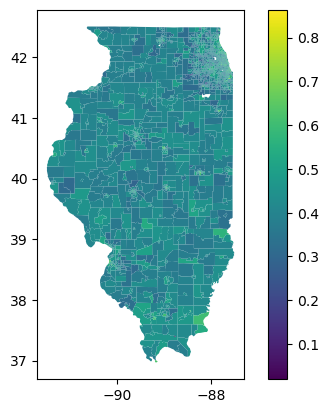

In [306]:
income_gdf.plot(column="gini index", legend=True)

In [302]:
agg_kwargs = {"numeric_only": None}

income_gdf_dissolved = income_gdf.dissolve(by='county',aggfunc='mean',**agg_kwargs)
income_gdf_dissolved.reset_index()

/Users/santi/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1780: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc, **kwargs)


,county,geometry,geoid,current land area (sq. m),current water area (sq. m),gini index,median gross rent
0,Adams,"POLYGON ((-91.42371 39.91215, -91.42341 39.912...",1.700100e+10,1.165698e+08,2.197596e+06,0.397153,739.555556
1,Alexander,"POLYGON ((-89.17242 37.01056, -89.17240 37.010...",1.700396e+10,1.524169e+08,1.115980e+07,0.461550,692.000000
2,Bond,"POLYGON ((-89.25668 38.91208, -89.25662 38.906...",1.700595e+10,2.462663e+08,1.615657e+06,0.431775,676.750000
3,Boone,"POLYGON ((-88.94091 42.24713, -88.94091 42.247...",1.700701e+10,7.271146e+07,3.360626e+05,0.377160,1248.300000
4,Brown,"POLYGON ((-90.91709 39.88641, -90.91709 39.886...",1.700997e+10,3.959143e+08,2.072173e+06,0.393850,578.000000
...,...,...,...,...,...,...,...
97,Whiteside,"POLYGON ((-90.18476 41.58943, -90.18421 41.589...",1.719500e+10,9.325310e+07,1.678092e+06,0.417921,776.000000
98,Will,"POLYGON ((-88.19605 41.20245, -88.19894 41.202...",1.719788e+10,1.258667e+07,2.009877e+05,0.361460,1447.891892
99,Williamson,"POLYGON ((-89.15345 37.60928, -89.15343 37.610...",1.719902e+10,6.046327e+07,3.470584e+06,0.436939,777.722222
100,Winnebago,"POLYGON ((-89.07722 42.15081, -89.07852 42.150...",1.720101e+10,1.660991e+07,1.984249e+05,0.414818,909.649351


<Axes: >

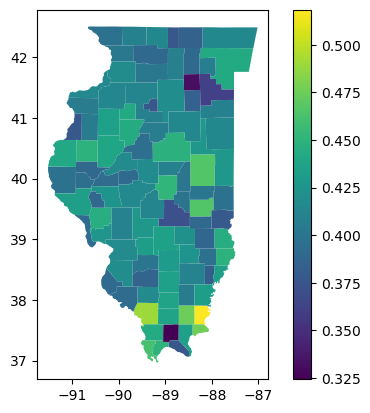

In [303]:
income_gdf_dissolved.plot(column="gini index", legend=True)
